### importing the necessary libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('../Dataset/bank.csv')

In [33]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


(   age         job  marital  education default  balance housing loan  contact  \
 0   59      admin.  married  secondary      no     2343     yes   no  unknown   
 1   56      admin.  married  secondary      no       45      no   no  unknown   
 2   41  technician  married  secondary      no     1270     yes   no  unknown   
 3   55    services  married  secondary      no     2476     yes   no  unknown   
 4   54      admin.  married   tertiary      no      184      no   no  unknown   
 
    day month  duration  campaign  pdays  previous poutcome deposit  
 0    5   may      1042         1     -1         0  unknown     yes  
 1    5   may      1467         1     -1         0  unknown     yes  
 2    5   may      1389         1     -1         0  unknown     yes  
 3    5   may       579         1     -1         0  unknown     yes  
 4    5   may       673         2     -1         0  unknown     yes  ,
 None)

In [34]:
df.nunique(), df.columns

(age            76
 job            12
 marital         3
 education       4
 default         2
 balance      3805
 housing         2
 loan            2
 contact         3
 day            31
 month          12
 duration     1428
 campaign       36
 pdays         472
 previous       34
 poutcome        4
 deposit         2
 dtype: int64,
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'deposit'],
       dtype='object'))

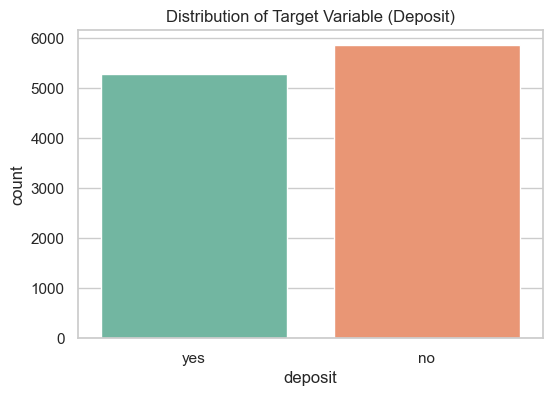

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


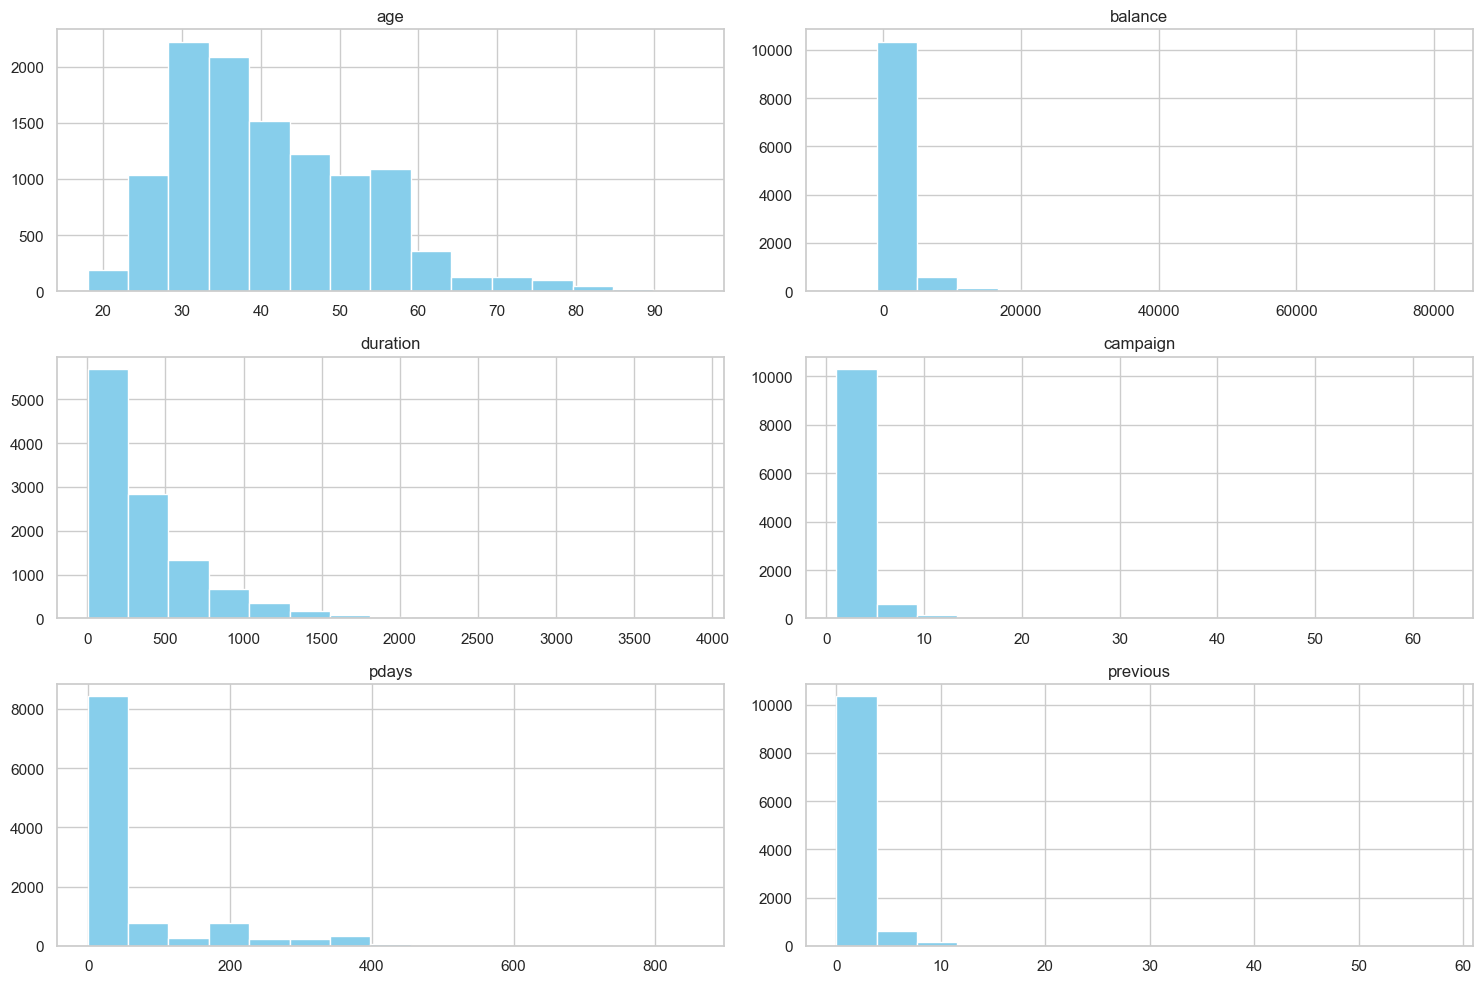

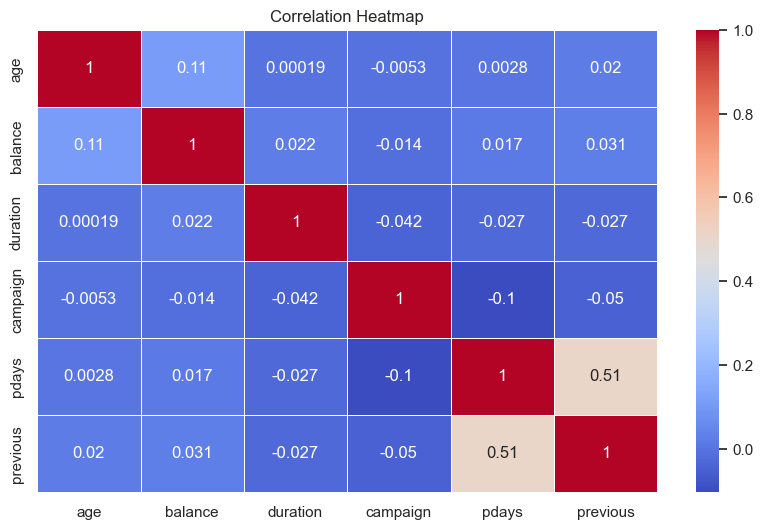

In [35]:

# 1. Distribution of Target Variable (deposit)
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Deposit)')
plt.show()

# 2. Summary statistics for numerical columns
print(df.describe())

# 3. Histograms for numerical features
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 2), color='skyblue')
plt.tight_layout()
plt.show()

# 4. Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Data Preprocessing

In [37]:
# 1. Check for missing values
print(df.isnull().sum())

# 2. Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
df_encoded
X = df_encoded
y = df_encoded['deposit_yes']  # This column will be created by get_dummies
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [39]:
# Helper function for evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    roc_score = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC Score: {roc_score}")
    return roc_score

### 1. Logistic Regression

In [40]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
print("Logistic Regression Performance:")
evaluate_model(log_reg, X_test, y_test)

Logistic Regression Performance:
[[1741    1]
 [   0 1607]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1742
        True       1.00      1.00      1.00      1607

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

ROC-AUC Score: 0.9997129735935706


np.float64(0.9997129735935706)

### 2. Decision Tree Classifier

In [41]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
print("\nDecision Tree Performance:")
evaluate_model(decision_tree, X_test, y_test)


Decision Tree Performance:
[[1742    0]
 [   0 1607]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1742
        True       1.00      1.00      1.00      1607

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

ROC-AUC Score: 1.0


np.float64(1.0)

### 3. Random Forest Classifier

In [42]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)
print("\nRandom Forest Performance:")
evaluate_model(random_forest, X_test, y_test)


Random Forest Performance:
[[1742    0]
 [   0 1607]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1742
        True       1.00      1.00      1.00      1607

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

ROC-AUC Score: 1.0


np.float64(1.0)

### 1. Logistic Regression Hyperparameter Tuning

In [44]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers
}

log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
print(f"Best parameters for Logistic Regression: {log_reg_grid.best_params_}")
print(f"Best accuracy for Logistic Regression: {log_reg_grid.best_score_}")

# Evaluate the best Logistic Regression model
best_log_reg = log_reg_grid.best_estimator_
print("\nTuned Logistic Regression Performance:")
evaluate_model(best_log_reg, X_test, y_test)

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 1.0

Tuned Logistic Regression Performance:
[[1740    2]
 [   0 1607]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1742
        True       1.00      1.00      1.00      1607

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

ROC-AUC Score: 0.9994259471871413


np.float64(0.9994259471871413)

### 2. Decision Tree Classifier Hyperparameter Tuning

In [45]:
decision_tree = DecisionTreeClassifier(random_state=42)
tree_params = {
    'max_depth': [3, 5, 10, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

tree_grid = GridSearchCV(decision_tree, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
print(f"Best parameters for Decision Tree: {tree_grid.best_params_}")
print(f"Best accuracy for Decision Tree: {tree_grid.best_score_}")

# Evaluate the best Decision Tree model
best_tree = tree_grid.best_estimator_
print("\nTuned Decision Tree Performance:")
evaluate_model(best_tree, X_test, y_test)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy for Decision Tree: 1.0

Tuned Decision Tree Performance:
[[1742    0]
 [   0 1607]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1742
        True       1.00      1.00      1.00      1607

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

ROC-AUC Score: 1.0


np.float64(1.0)

### 3. Random Forest Classifier Hyperparameter Tuning

In [46]:
random_forest = RandomForestClassifier(random_state=42)
forest_params = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

forest_grid = GridSearchCV(random_forest, forest_params, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print(f"Best parameters for Random Forest: {forest_grid.best_params_}")
print(f"Best accuracy for Random Forest: {forest_grid.best_score_}")

# Evaluate the best Random Forest model
best_forest = forest_grid.best_estimator_
print("\nTuned Random Forest Performance:")
evaluate_model(best_forest, X_test, y_test)

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy for Random Forest: 1.0

Tuned Random Forest Performance:
[[1742    0]
 [   0 1607]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1742
        True       1.00      1.00      1.00      1607

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349

ROC-AUC Score: 1.0


np.float64(1.0)